# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [129]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import warnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [24]:
# Ignorando warnings de execução
warnings.filterwarnings("ignore")

In [25]:
# Definindo o tamanho dos gráficos
plt.rcParams['figure.figsize'] = (8, 5)

In [26]:
# Escolhendo paleta de cores dos gráficos
sns.set_palette("Accent")
sns.set_style("whitegrid")
sns.set(font_scale=1)

In [27]:
# Montando o acesso ao Google Drive, para acessar os dados necessários
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Definindo a pasta onde estão os arquivos
file_path = ('/content/drive/MyDrive/Faculdade/2. Sirius/1. Módulo/2. Estatística Básica para BI/')

In [29]:
# Carregando o arquivo do Ideb
ideb = pd.read_csv(file_path + 'dados_ideb_2.csv')

In [30]:
# Visualizando os dados do Ideb
ideb.head(5)

,Unnamed: 0,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,0,2005,AC,1200054,municipal,fundamental,iniciais (1-5),64.1,0.645727,161.8,150.80,3.794003,2.4,NaN
1,1,2005,AC,1200302,municipal,fundamental,iniciais (1-5),53.9,0.561795,167.8,165.60,4.177761,2.3,NaN
2,2,2005,AC,1200328,estadual,fundamental,iniciais (1-5),49.3,0.501470,151.8,149.60,3.578558,1.8,NaN
3,3,2005,AC,1200328,municipal,fundamental,iniciais (1-5),48.8,0.494267,163.6,155.80,3.920963,1.9,NaN
4,4,2005,AC,1200328,publica,fundamental,iniciais (1-5),48.8,0.497858,159.0,153.39,3.785995,1.9,NaN


In [89]:
# Selecionando as colunas desejadas
ideb_estados = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]

# Visualizando o df
ideb_estados.head(10)

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
5,2005,AC,74.7,138.00,134.19,2.3
6,2005,AC,58.6,156.60,149.39,2.3
7,2005,AC,45.3,150.00,155.39,1.7
8,2005,AC,50.1,152.00,153.60,1.9
9,2005,AC,60.8,150.19,142.19,2.1


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [90]:
# Verificando o tamanho do df Ideb
ideb_estados.shape

(130194, 6)

In [91]:
# Conferindo dados faltantes
(ideb_estados.isna().sum() / len(ideb_estados)).round(2)

ano                            0.00
sigla_uf                       0.00
taxa_aprovacao                 0.21
nota_saeb_matematica           0.32
nota_saeb_lingua_portuguesa    0.32
ideb                           0.23
dtype: float64

Como o percentual de dados faltantes nas colunas `taxa_aprovacao`,`nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` é alto, o indicado é remover os dados faltantes.

In [92]:
# Removendo dados faltantes
ideb_estados = ideb_estados.dropna()

In [93]:
# Validando após remover dados faltantes
print((ideb_estados.isna().sum() / len(ideb_estados)).round(2))
print(f'\n{ideb_estados.shape}')

ano                            0.0
sigla_uf                       0.0
taxa_aprovacao                 0.0
nota_saeb_matematica           0.0
nota_saeb_lingua_portuguesa    0.0
ideb                           0.0
dtype: float64

(88321, 6)


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


In [94]:
# Informações do df tratado
ideb_estados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88321 entries, 0 to 130193
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          88321 non-null  int64  
 1   sigla_uf                     88321 non-null  object 
 2   taxa_aprovacao               88321 non-null  float64
 3   nota_saeb_matematica         88321 non-null  float64
 4   nota_saeb_lingua_portuguesa  88321 non-null  float64
 5   ideb                         88321 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.7+ MB


In [95]:
# Filtrando o ano e a coluna desejada
taxa_aprovacao_2005 = ideb_estados[ideb_estados['ano'] == 2005][['taxa_aprovacao']]

# Conferindo o df
taxa_aprovacao_2005.head()

,taxa_aprovacao
0,64.1
1,53.9
2,49.3
3,48.8
4,48.8


In [49]:
# Alterando o tipo dos dados
taxa_aprovacao_2005['taxa_aprovacao'] = taxa_aprovacao_2005.astype({'taxa_aprovacao' : float})

In [56]:
# Conferindo tipo dos dados
taxa_aprovacao_2005.dtypes

taxa_aprovacao    float64
dtype: object

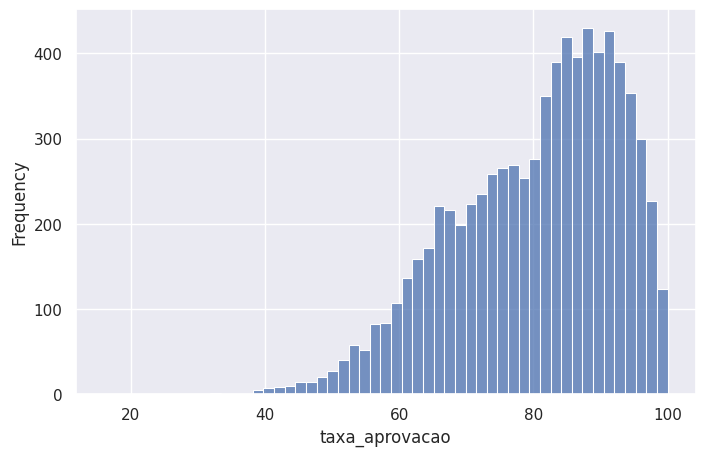

In [58]:
# Visualizando a distribuição das taxas de aprovação
sns.histplot(taxa_aprovacao_2005, x='taxa_aprovacao', stat='frequency');

In [52]:
# Teste T para uma amostra com a coluna do tipo int
sci.ttest_1samp(taxa_aprovacao_2005['taxa_aprovacao'],
                popmean = 78,
                alternative='two-sided')

TtestResult(statistic=16.86942327753027, pvalue=3.9782746538032463e-63, df=12082)

In [84]:
# Teste T para uma amostra com a coluna do tipo float
result_ttest_1samp_equal = sci.ttest_1samp(taxa_aprovacao_2005['taxa_aprovacao'],
                                           popmean = 78,
                                           alternative='two-sided')
print(f'O valor do P-Value é igual a {result_ttest_1samp_equal.pvalue:.4f}')

O valor do P-Value é igual a 0.0000


**Resultado para igual**
```
H0: taxa de aprovação = 78
H1: taxa de aprovação <> 78
```

Ao nível de significância de 5%, a hipótese nula (H0) é rejeitada, dado que o P-Valor é ~0.

Assim, rejeitamos a hipótese nula, assumindo que o valor da **taxa de aprovação** média, para o ano de 2005, é **diferente de 78**.

In [83]:
# Teste T para uma hipótese nula de a média ser maior do que 78
result_ttest_1samp_greater = sci.ttest_1samp(taxa_aprovacao_2005['taxa_aprovacao'],
                                             popmean = 78,
                                             alternative='greater')
print(f'O valor do P-Value é igual a {result_ttest_1samp_greater.pvalue:.4f}')

O valor do P-Value é igual a 0.0000


**Resultado para maior**
```
H0: taxa de aprovação <= 78
H1: taxa de aprovação > 78
```

Ao nível de significância de 5%, a hipótese nula (H0) é rejeitada, dado que o P-Valor é ~0.

Assim, rejeitamos a hipótese nula, assumindo que o valor da **taxa de aprovação** média, para o ano de 2005, é **maior que 78**.

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

In [60]:
# Filtrando o ano e a coluna desejada
ideb_2019 = ideb_estados[ideb_estados['ano'] == 2019][['ideb', 'sigla_uf']]

# Conferindo o df
ideb_2019.head()

,ideb,sigla_uf
3409,8.1,AC
3410,8.9,AL
3411,8.9,AL
3412,8.1,AL
3413,8.1,AL


In [88]:
# Criando um df para cada estado
ideb_2019_rs = ideb_2019[ideb_2019['sigla_uf'] == 'RS'][['ideb', 'sigla_uf']]
ideb_2019_ce = ideb_2019[ideb_2019['sigla_uf'] == 'CE'][['ideb', 'sigla_uf']]

# Visualizando os resultados
print(ideb_2019_rs.head(3))
print(ideb_2019_ce.head(3))

      ideb sigla_uf
3836   7.5       RS
3837   7.1       RS
3838   7.3       RS
      ideb sigla_uf
3424   7.3       CE
3425   7.3       CE
3426   7.3       CE


In [67]:
type(ideb_2019_rs['ideb'])

pandas.core.series.Series

In [87]:
# Teste T para duas amostras
result_ttest_ind_equal = sci.ttest_ind(ideb_2019_rs['ideb'],
                                       ideb_2019_ce['ideb'],
                                       alternative='two-sided')
print(f'O valor do P-Value é igual a {result_ttest_ind_equal.pvalue:.4f}')

O valor do P-Value é igual a 0.0000


**Resultado para igual**
```
H0: média IDEB RS = média IDEB CE
H1: média IDEB RS <> média IDEB CE
```

Ao nível de significância de 1%, a hipótese nula (H0) é rejeitada, dado que o P-Valor é ~0. Ao nível de 5 ou 10% de significância também seria rejeitado.

Assim, rejeitamos a hipótese nula, assumindo que as notas médias do IDEB, para o ano de 2019, entre os estados do Rio Grande do Sul e do Ceará, são **diferentes entre si**.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

In [102]:
# Agrupando os dois dfs em um só
ideb_2019_rs_ce = pd.concat([ideb_2019_rs, ideb_2019_ce])

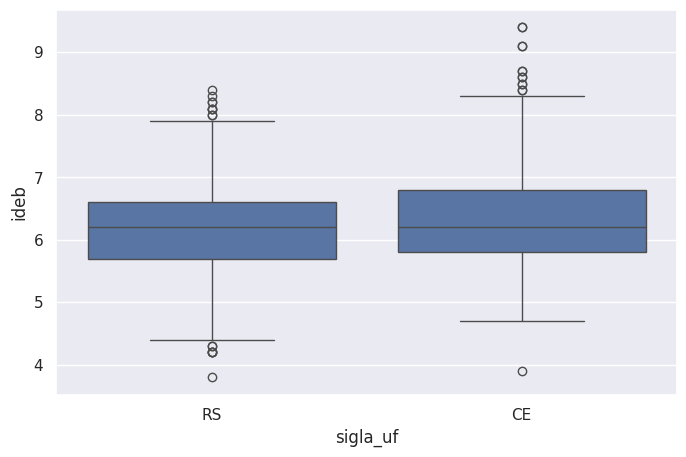

In [104]:
# Visualizando a distribuição das notas por estados
sns.boxplot(x=ideb_2019_rs_ce['sigla_uf'], y=ideb_2019_rs_ce['ideb']);

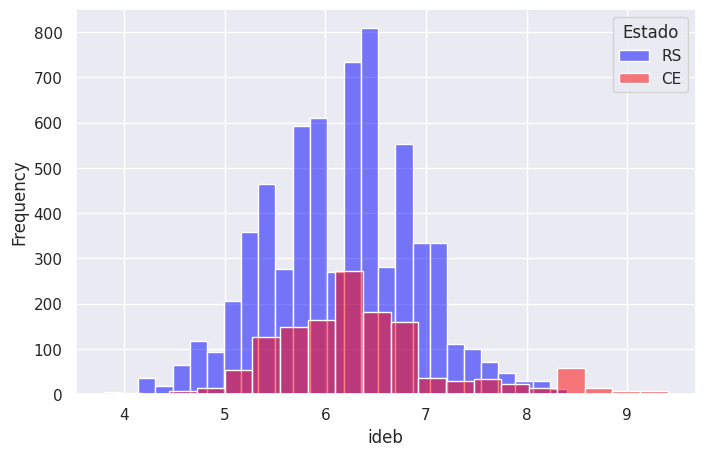

In [120]:
# Visualizando a distribuição de outra maneira
sns.histplot(ideb_2019_rs_ce[ideb_2019_rs_ce['sigla_uf'] == 'RS'],
             x='ideb',
             stat='frequency',
             label='RS',
             color='blue',
             alpha=0.5)
sns.histplot(ideb_2019_rs_ce[ideb_2019_rs_ce['sigla_uf'] == 'CE'],
             x='ideb',
             stat='frequency',
             label='CE',
             color='red',
             alpha=0.5)

# Adicionando a legenda
plt.legend(title='Estado', loc='upper right')

# Exibindo o gráfico
plt.show()

In [110]:
# Calculando os valores estatísticos
estatisticas = ideb_2019_rs_ce.groupby('sigla_uf')['ideb'].agg(['mean', 'median', 'quantile']).reset_index().round(2)
estatisticas

,sigla_uf,mean,median,quantile
0,CE,6.36,6.2,6.2
1,RS,6.16,6.2,6.2


### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [111]:
# Filtrando os anos e as colunas desejadas
ideb_2005_sample = ideb_estados[ideb_estados['ano'] == 2005][['ideb', 'ano']].sample(300)
ideb_2019_sample = ideb_estados[ideb_estados['ano'] == 2019][['ideb', 'ano']].sample(300)

# Conferindo os dataframes
print(ideb_2005_sample.head())
print(ideb_2019_sample.head())

       ideb   ano
74592   3.3  2005
74782   3.3  2005
74952   3.3  2005
17      2.3  2005
491     2.2  2005
        ideb   ano
53000    6.5  2019
72074    6.3  2019
110080   6.4  2019
108386   5.9  2019
50975    6.0  2019


In [112]:
# Conferindo o tamanho dos dataframes
print(ideb_2005_sample.shape)
print(ideb_2019_sample.shape)

(300, 2)
(300, 2)


In [113]:
# Teste T para duas amostras
ttest_rel_equal = sci.ttest_rel(ideb_2005_sample['ideb'],
                                ideb_2019_sample['ideb'],
                                alternative='two-sided')
print(f'O valor do P-Value é igual a {ttest_rel_equal.pvalue:.4f}')

O valor do P-Value é igual a 0.0000


**Resultado para igual**
```
H0: média IDEB 2005 = média IDEB 2019
H1: média IDEB 2005 <> média IDEB 2019
```

Ao nível de significância de 1%, a hipótese nula (H0) é rejeitada, dado que o P-Valor é ~0. Ao nível de 5 ou 10% de significância também seria rejeitado.

Assim, rejeitamos a hipótese nula, assumindo que as notas médias do IDEB, para os anos de 2005 e 2019, são **diferente entre si**.

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

In [115]:
# Agrupando os dois dfs em um só
ideb_2005_2019_sample = pd.concat([ideb_2005_sample, ideb_2019_sample])

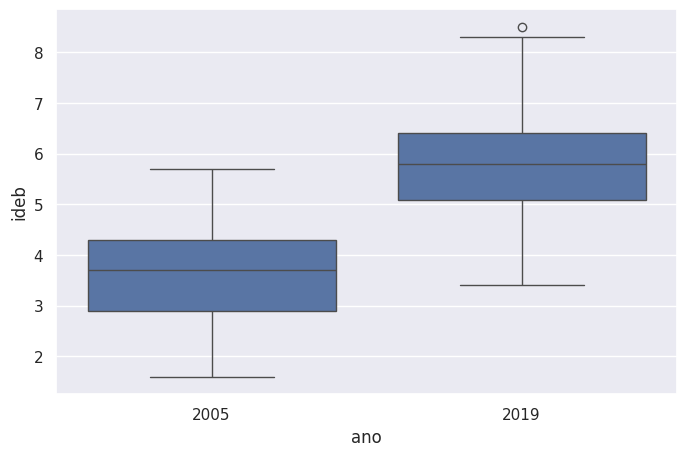

In [117]:
# Visualizando a distribuição das notas por ano
sns.boxplot(ideb_2005_2019_sample, x='ano', y='ideb');

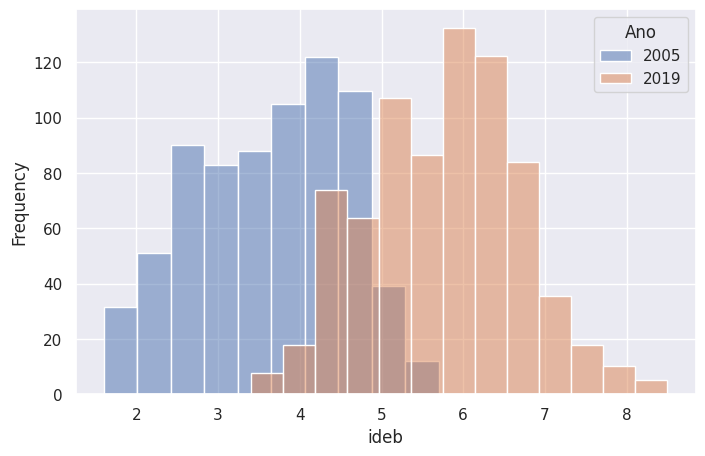

In [122]:
# Visualizando a distribuição de outra maneira
sns.histplot(ideb_2005_2019_sample[ideb_2005_2019_sample['ano'] == 2005],
             x='ideb',
             stat='frequency',
             label= 2005,
             alpha=0.5)
sns.histplot(ideb_2005_2019_sample[ideb_2005_2019_sample['ano'] == 2019],
             x='ideb',
             stat='frequency',
             label= 2019,
             alpha=0.5)

# Adicionando a legenda
plt.legend(title='Ano', loc='upper right')

# Exibindo o gráfico
plt.show()

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [124]:
# Filtrando o ano, o estado e as colunas desejadas
ideb_pr = ideb_estados[ideb_estados['ano'] == 2019][ideb_estados['sigla_uf'] == 'PR'][['ideb', 'sigla_uf']]
ideb_rs = ideb_estados[ideb_estados['ano'] == 2019][ideb_estados['sigla_uf'] == 'RS'][['ideb', 'sigla_uf']]
ideb_sc = ideb_estados[ideb_estados['ano'] == 2019][ideb_estados['sigla_uf'] == 'SC'][['ideb', 'sigla_uf']]

# Conferindo os dataframes
print(ideb_pr.head())
print(ideb_rs.head())
print(ideb_sc.head())

      ideb sigla_uf
3714   7.6       PR
3715   7.6       PR
3716   7.1       PR
3717   7.1       PR
3718   8.3       PR
      ideb sigla_uf
3836   7.5       RS
3837   7.1       RS
3838   7.3       RS
3839   7.5       RS
3840   8.0       RS
      ideb sigla_uf
3961   7.4       SC
3962   7.2       SC
3963   7.2       SC
3964   7.5       SC
3965   7.9       SC


In [125]:
# Conferindo o tamanho dos dataframes
print(ideb_pr.shape)
print(ideb_rs.shape)
print(ideb_sc.shape)

(796, 2)
(1117, 2)
(693, 2)


In [126]:
# Teste ANOVA
f_oneway = sci.f_oneway(ideb_pr['ideb'],
                        ideb_rs['ideb'],
                        ideb_sc['ideb'])
print(f'O valor do P-Value é igual a {f_oneway.pvalue:.4f}')

O valor do P-Value é igual a 0.0000


**Resultado**
```
H0: média IDEB PR = média IDEB RS = média IDEB SC
H1: média IDEB PR <> média IDEB RS <> média IDEB SC
```

Ao nível de significância de 5%, a hipótese nula (H0) é rejeitada, dado que o P-Valor é ~0.

Assim, rejeitamos a hipótese nula, assumindo que **nem todas as notas médias** do IDEB, em 2019, para os estados do Paraná, Rio Grande do Sul e Santa Catarina, são **iguais entre si**.

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

In [127]:
# Agrupando os dfs em um só
ideb_2019_sul = pd.concat([ideb_pr, ideb_rs, ideb_sc])

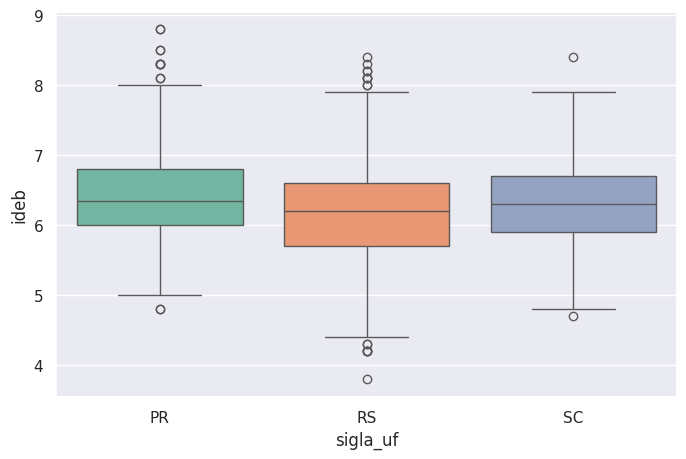

In [128]:
# Visualizando a distribuição das notas por ano
palette = sns.color_palette("Set2")
sns.boxplot(ideb_2019_sul, x='sigla_uf', y='ideb', palette=palette);

# Mostrando o gráfico
plt.show()

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [130]:
print(pairwise_tukeyhsd(endog = ideb_2019_sul['ideb'],
                        groups = ideb_2019_sul['sigla_uf'],
                        alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------


**Resultado**
```
H0: média IDEB PR = média IDEB RS = média IDEB SC
H1: média IDEB PR <> média IDEB RS <> média IDEB SC
```

Ao nível de significância de 5%, a hipótese nula (H0) é rejeitada em todas as comparações.

Assim, rejeitamos a hipótese nula, assumindo que o IDEB, em 2019, para os estados do Paraná, Rio Grande do Sul e Santa Catarina, **é diferente entre si** em cada uma das comparações.